In [82]:
#  importing the tensorflow and keras directories
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
import pandas as pd
import numpy as np

from tensorflow.keras import models
from tensorflow.keras.models import Sequential

#  importing the utilities from keras
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.datasets import boston_housing

In [83]:
# splitting the boston dataset

(x_train,y_train,) , (x_test,y_test) = boston_housing.load_data()


In [84]:
# Data Preprocessing

# checking the shapes of training and test data

print (x_train.shape)
print (x_test.shape)
print(y_train.shape)
print(y_test.shape)


(404, 13)
(102, 13)
(404,)
(102,)


** from the above result we find that the dataset has 506 instances and 13 independent variables

In [85]:
# defining parameters
NUM_ROWS = 506          #  this we have seen earlier
NUM_COLUMNS = 13       #  this we have seen earlier
BATCH_SIZE = 200       # this is a hyperparameter; this is the number of instances that will be processed in one go
EPOCH = 20             # the number of times the operations happen 

In [86]:
# normalising the training data

x_train = tf.keras.layers.UnitNormalization()(x_train)
x_test = tf.keras.layers.UnitNormalization()(x_test)

In [87]:
# rechecking if this standardisation has happened
print(x_train[10])

tf.Tensor(
[0.01242039 0.         0.02342809 0.         0.000897   0.00828914
 0.12943694 0.00212147 0.03106487 0.86205006 0.02614626 0.4868253
 0.02628864], shape=(13,), dtype=float32)


In [88]:
#build Neural with 2 hidden layers

model = models.Sequential()
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(1,activation = 'relu'))

In [89]:
# model evaluation

tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")

In [90]:
# model evaluation

model.compile( optimizer='sgd',loss='mse', metrics=[tf.keras.metrics.MeanSquaredError()])

In [106]:
# fitting the model

history = model.fit(x_train,y_train,batch_size = BATCH_SIZE, epochs = EPOCH)

Epoch 1/20
3/3 [==============================] - 0s 15ms/step - loss: 65.7259 - mean_squared_error: 65.7259
Epoch 2/20
3/3 [==============================] - 0s 16ms/step - loss: 75.5377 - mean_squared_error: 75.5377
Epoch 3/20
3/3 [==============================] - 0s 26ms/step - loss: 200.8193 - mean_squared_error: 200.8193
Epoch 4/20
3/3 [==============================] - 0s 14ms/step - loss: 78.6170 - mean_squared_error: 78.6170
Epoch 5/20
3/3 [==============================] - 0s 15ms/step - loss: 72.8535 - mean_squared_error: 72.8535
Epoch 6/20
3/3 [==============================] - 0s 19ms/step - loss: 77.6761 - mean_squared_error: 77.6761
Epoch 7/20
3/3 [==============================] - 0s 18ms/step - loss: 68.4019 - mean_squared_error: 68.4019
Epoch 8/20
3/3 [==============================] - 0s 17ms/step - loss: 72.5849 - mean_squared_error: 72.5849
Epoch 9/20
3/3 [==============================] - 0s 19ms/step - loss: 88.1310 - mean_squared_error: 88.1310
Epoch 10/20
3/3 [

In [107]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 512)               7168      
                                                                 
 dense_23 (Dense)            (None, 512)               262656    
                                                                 
 dense_24 (Dense)            (None, 1)                 513       
                                                                 
Total params: 270,337
Trainable params: 270,337
Non-trainable params: 0
_________________________________________________________________


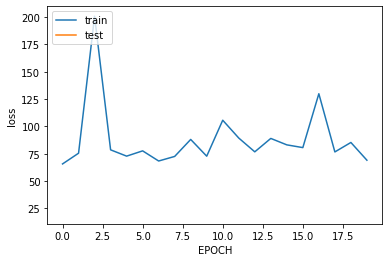

In [108]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot([EPOCH])
plt.ylabel('loss')
plt.xlabel('EPOCH')
plt.legend(['train','test'],loc = 'upper left')
plt.show()
